# Exercício 06
## Teste de Hipótese
### Alunos:

- Guilherme Michel Lima de Carvalho 11175052
- Jaqueline Lopes Dias 11551472
- Marcos Jardel Henriques 10357438

---


## Objetivos da prática:
- Utilizar testes estatísticos para selecionar um modelo
- Utilizar ferramentas visuais para avaliar modelos


---

## Funções novas utilizadas no exercício

- `pandas.Series.nunique()` ([link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html)): Conta quantidade de valores únicos de uma coluna. Útil para verificar se uma coluna é relevante ou não
- `scipy.stats.ttest_rel()` ([link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)): Calcula o teste t para duas amostras
- `scipy.stats` ([link](https://docs.scipy.org/doc/scipy/reference/stats.html)) Implementações de alguns testes estatísticos
- `sklearn.metrics.plot_roc_curve()` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)): Plota a curva ROC de um classificador dado um conjunto de input e alvo





---

Nesse exercício utilizaremos o dataset [Titanic](https://www.kaggle.com/c/titanic/overview) disponível no arquivo `titanic.csv`. Ele é um dataset de classificação binário, onde o objetivo é prever se um dado passageiro do titanic sobreviveu ou não ao naufrágio. Informações sobre os atributos podem ser vistas [aqui](https://www.kaggle.com/c/titanic/data)

---


### Questão 01.

Faça a exploração dos dados. Isto é, carregue, substitua valores faltantes, padronize os dados, etc. Faça também a seleção dos atributos que achar mais relevantes. 

 - Dica: Tente utilizar a função `nunique()` durante a exploração dos dados. Você também pode utilizar o "bom senso" (além de outras ferramentas é claro) na hora de escolher qual atributo do conjunto manter

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
data_titanic = pd.read_csv('titanic.csv')

In [4]:
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print('O dataset contém um total de '+  str(format(data_titanic.shape[0])) + ' observações '  + str(format(data_titanic.shape[1])) + ' colunas')

O dataset contém um total de 891 observações 12 colunas


**Vejamos quantas observações faltantes tem em cada coluna e vamos substituir usando alguma técnica** 

In [7]:
table_missing = data_titanic.isnull().sum()[1:12]
table_missing = table_missing.to_frame()
table_missing.columns = ['Qtd Missing Data']

In [8]:
table_missing

,Qtd Missing Data
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


Vejamos num plot como estão esses missing data.

In [9]:
import missingno as miss

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


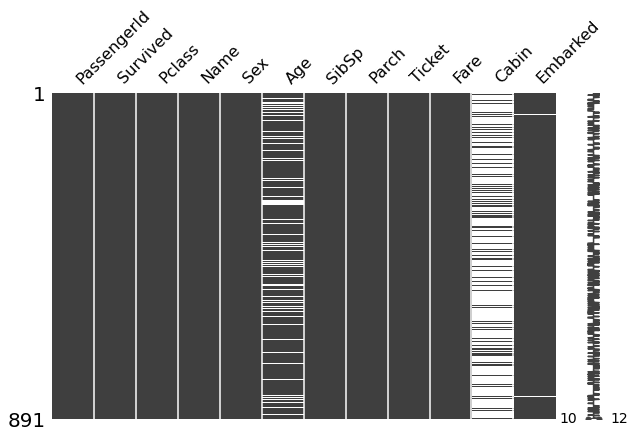

In [10]:

miss.matrix(data_titanic, figsize = (10, 6))

Temos missing data em várias idades e também nas cabines e embarked. Vejamos uma ténica para substituir esses missing data.

Para a idade, como é uma variável numérica, usaremos simplesmente a média.
Para as outras variáveis, como são categoricas, usaremos a valor mais comum na coluna.

In [18]:
data_titanic["Age"].fillna(data_titanic['Age'].mean(), inplace=True)

In [19]:
data_titanic['Embarked'].fillna(data_titanic['Embarked'].value_counts().index[0], inplace=True)

In [20]:
data_titanic['Cabin'].fillna(data_titanic['Cabin'].value_counts().index[0],inplace=True)

In [21]:
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S


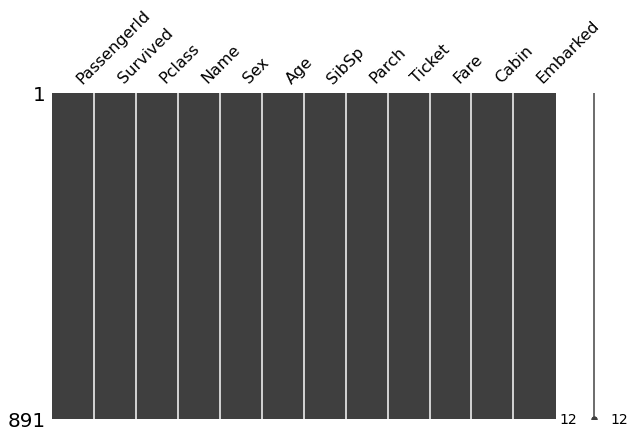

In [22]:

miss.matrix(data_titanic, figsize = (10, 6))

Ok! Agora não temos mais variáveis faltantes no dataset, agora vejamos uma análise exploratória dos dados.

In [23]:
survived = data_titanic[data_titanic['Survived'] == 1]
not_survived = data_titanic[data_titanic['Survived'] == 0]

In [24]:
import seaborn as sns

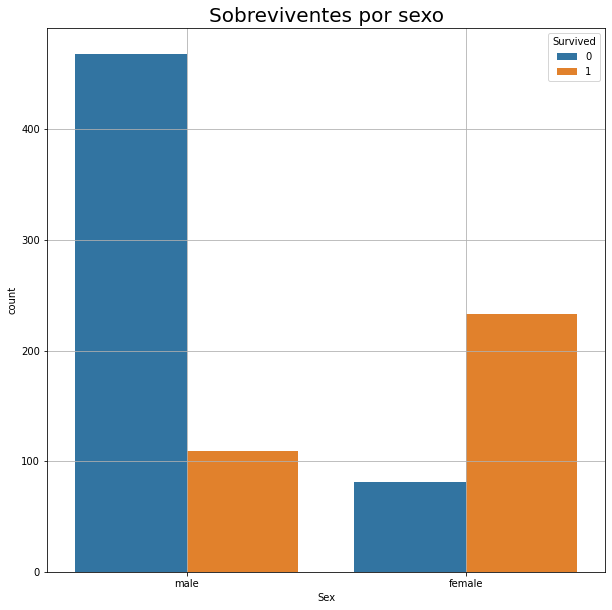

In [25]:
plt.figure(figsize=(10,10))
plt.title('Sobreviventes por sexo', fontsize=20)
sns.countplot('Sex',data=data_titanic,hue='Survived')
plt.grid()

Vemos por exemplo que a maioria dos homens morreram. Enquanto as mulheres foram priorizadas para sobreviver.

Agora vamos tirar algumas variáveis irrelavantes, por exemplo o nome do passageiro


In [26]:
data_titanic['Cabin'].value_counts()

G6             691
B96 B98          4
C23 C25 C27      4
F2               3
E101             3
              ... 
B3               1
D50              1
E63              1
B73              1
D45              1
Name: Cabin, Length: 147, dtype: int64

In [27]:
data_titanic['Ticket'].value_counts()

CA. 2343    7
1601        7
347082      7
CA 2144     6
347088      6
           ..
367231      1
234686      1
113794      1
349236      1
2003        1
Name: Ticket, Length: 681, dtype: int64

Vejamos que as variáveis `Cabin` e `Ticket` também não são muito informativas, e portanto podem também adicionar mais ruídos do que ajudar no modelo. Portanto, vamos tirar.

In [28]:
data_titanic = data_titanic.drop(['Cabin','Ticket','Name'],axis=1)

Assim ficou o dataset por enquanto:

In [29]:
data_titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Vejamos se a classe em que o passageiro se encontrava impacta na sobrevivencia:

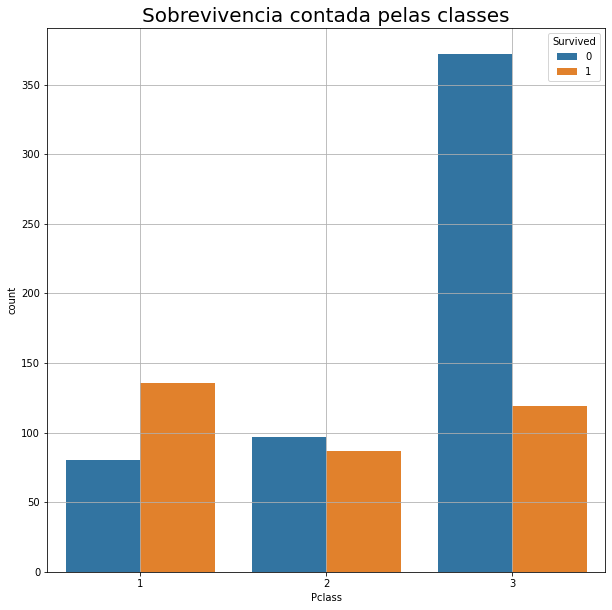

In [30]:
plt.figure(figsize=(10,10))
plt.title('Sobrevivencia contada pelas classes',fontsize=20)
sns.countplot('Pclass',data=data_titanic,hue='Survived')
plt.grid()

Nota-se claramente que a maioria que morreu pertencia a classe 3.


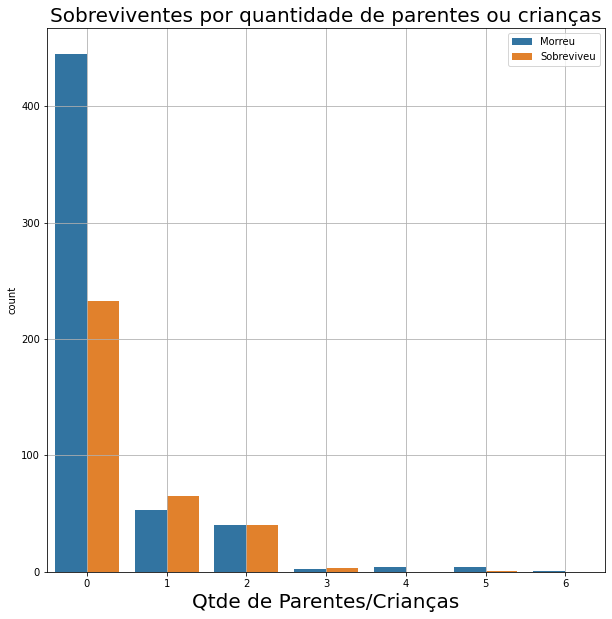

In [31]:
plt.figure(figsize=(10,10))
plt.title('Sobreviventes por quantidade de parentes ou crianças', fontsize=20)

sns.countplot('Parch',data=data_titanic,hue='Survived')
plt.xlabel('Qtde de Parentes/Crianças',fontsize=20)
plt.legend(['Morreu','Sobreviveu'],loc='upper right')
plt.grid()

Vemos também que a maioria das pessoas que tinham 0 parentes/crianças morreram.

Vejamos agora as variáveis contínuas.

Text(0, 0.5, 'Density')

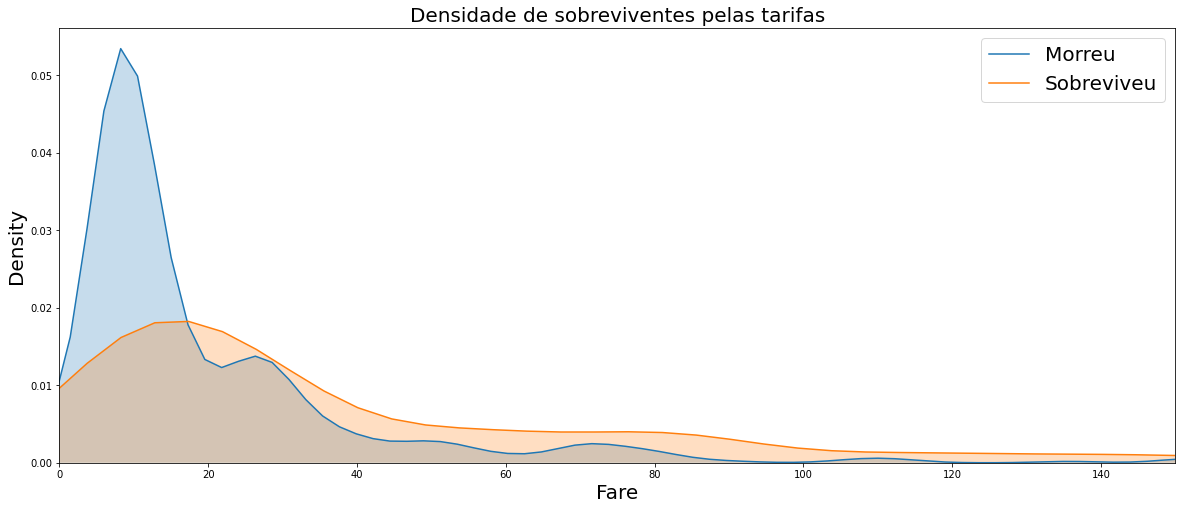

In [32]:
plt.figure(figsize=(20,8))
plt.title('Densidade de sobreviventes pelas tarifas',fontsize=20)


ax1 = sns.kdeplot(not_survived['Fare'],shade=True)
ax1.set_xlim((0,150))

ax2 = sns.kdeplot(survived['Fare'],shade=True)
ax2.set_xlim((0,150))

plt.legend(['Morreu','Sobreviveu'],loc='upper right',fontsize=20)
plt.xlabel('Fare',fontsize=20)
plt.ylabel('Density',fontsize=20)

Vemos também que a densidade das pessoas que morreram está concentrada para valores baixos da variável `Fare`. 

Text(0, 0.5, 'Density')

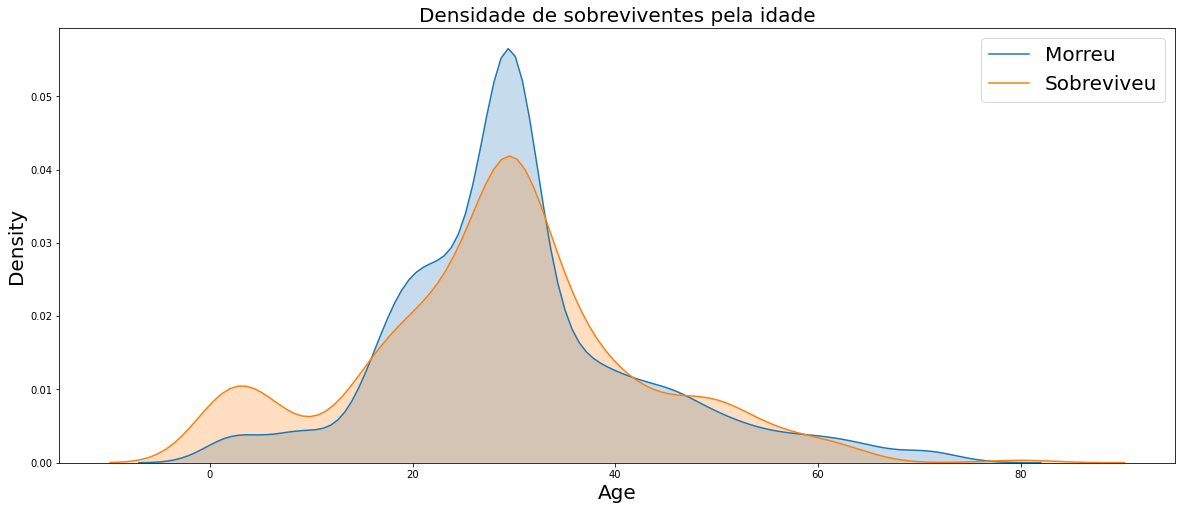

In [33]:
plt.figure(figsize=(20,8))
plt.title('Densidade de sobreviventes pela idade',fontsize=20)
ax1 = sns.kdeplot(not_survived['Age'],shade=True)
ax2 = sns.kdeplot(survived['Age'],shade=True)
plt.legend(['Morreu','Sobreviveu'],loc='upper right',fontsize=20)

plt.xlabel('Age',fontsize=20)
plt.ylabel('Density',fontsize=20)


Aqui, na densidade das pessoas que sobreviveram notamos um comportamento bimodal, perto das idades mais baixas. O que indica que bastante crianças sobreviveram(No filme tem isso, dá pra lembrar por lá também hehe).

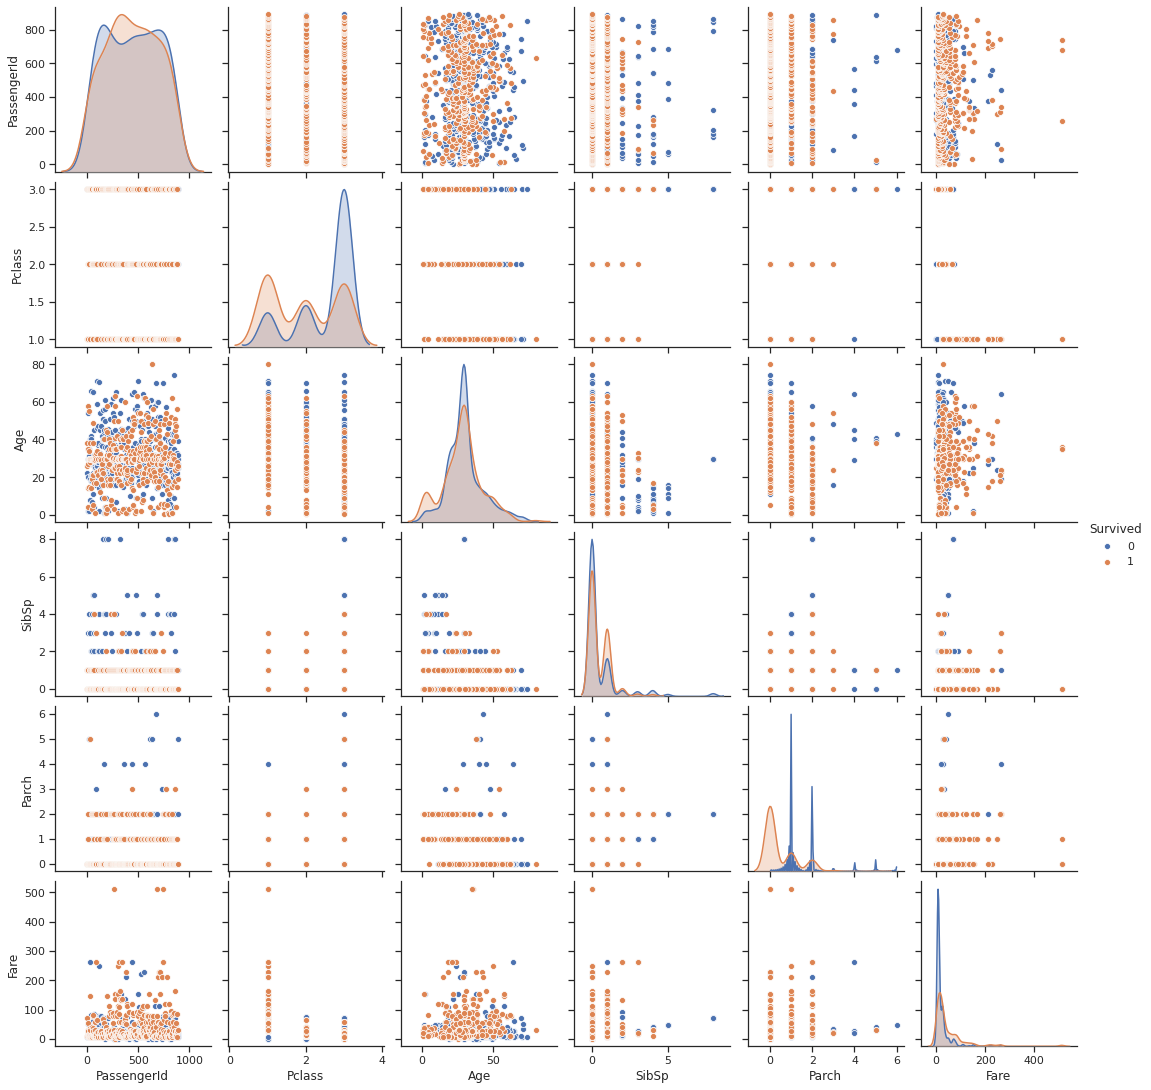

In [34]:
### Vendo tudo num pairplot
sns.set(style="ticks")
sns.pairplot(data_titanic,hue="Survived")

In [35]:
data_titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Vamos manter o dataset com essas variáveis que restaram, na hora do treino tiraremos o ID do passageiro, porque é único para cada pessoa, portanto não traz informação relevante para os modelos. Só restando agora transformar as variáveis categoricas em númericas.

In [36]:
data =  data_titanic.drop(['PassengerId'],axis=1)

In [37]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [38]:
cat_vars = data[['Pclass','Sex','Embarked']]
dummies = pd.get_dummies(cat_vars,drop_first=True)

In [39]:

data = data.drop(['Pclass','Sex','Embarked'],axis=1)

data = pd.concat([data,dummies],axis=1)


In [49]:
data.head()

,Survived,Age,SibSp,Parch,Fare,Pclass,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,3,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,0
2,1,26.0,0,0,7.9250,3,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1
4,0,35.0,0,0,8.0500,3,1,0,1


As únicas variáveis que precisariam de alguma padronização aqui seriam `Age` e `Fare`. Vejamos as perfomances sem padronizar.

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [64]:
X = data.drop(['Survived'],1)
y = data['Survived']



---

### Questão 02.

Utilize o 10-fold cross-validation para calcular a acurácia dos classificadores abaixo. Armazene a acurácia calculada em cada fold na variavel `scores` para cada um dos modelos.


In [65]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

classificadores = {
  "Perceptron" : {"modelo": Perceptron(), "scores": []},
  "Multi-Layer Perceptron (15,)" : {"modelo": MLPClassifier(random_state=1, hidden_layer_sizes=(15,), max_iter=2000), "scores": []},
  "SVM Polinomial Grau 3" : {"modelo": SVC(kernel='poly', degree=3, gamma='scale'), "scores": []},
  "Árvore Decisão Critério Gini" : {"modelo": DecisionTreeClassifier(criterion='gini'), "scores": []},  
  "KNN k=5" : {"modelo": KNeighborsClassifier(n_neighbors=5), "scores": []}
}

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
names = ['Perceptron','Multi-Layer Perceptron (15,)',"SVM Polinomial Grau 3", "Árvore Decisão Critério Gini","KNN k=5"]

In [68]:
for i in range(len(names)):
  classificadores[names[i]]['scores'].append(cross_val_score(classificadores[names[i]]['modelo'], X, y, cv=10))

In [69]:
classificadores

{'KNN k=5': {'modelo': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform'),
  'scores': [array([0.62222222, 0.65168539, 0.68539326, 0.69662921, 0.73033708,
          0.70786517, 0.74157303, 0.71910112, 0.65168539, 0.78651685])]},
 'Multi-Layer Perceptron (15,)': {'modelo': MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
                beta_2=0.999, early_stopping=False, epsilon=1e-08,
                hidden_layer_sizes=(15,), learning_rate='constant',
                learning_rate_init=0.001, max_fun=15000, max_iter=2000,
                momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
                power_t=0.5, random_state=1, shuffle=True, solver='adam',
                tol=0.0001, validation_fraction=0.1, verbose=False,
                warm_start=False),
  'scores': [array([0.63333333, 0.65168539, 0.775



---

### Questão 03.

Selecione os dois melhores classificadores e verifique se há diferença estatística significante entre suas acurácias utilizando o teste T (`scipy.stats.ttest_rel`). Você pode utilizar outro tipo de teste, desde que faça a justificativa. Considere que há diferença significante se p <= 0.05 (rejeita-se a hipótese nula)

- Nesse [link](https://machinelearningmastery.com/statistical-significance-tests-for-comparing-machine-learning-algorithms/) o autor discute alguns pontos interessantes para se escolher um teste estatístico
- No [link](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/) é feito um sumário dos testes implementados no scipy

Vejamos quais foram os dois melhores modelos pegando as médias.

In [74]:
classificadores[names[0]]['scores'][0]

array([0.75555556, 0.61797753, 0.61797753, 0.39325843, 0.70786517,
       0.58426966, 0.59550562, 0.70786517, 0.71910112, 0.73033708])

In [81]:
for i in range(len(classificadores)):
    print('A média da acurácia média em 10-fold do modelo ' + names[i] + ' foi de ' +  str(np.mean(classificadores[names[i]]['scores'][0])) )


A média da acurácia média em 10-fold do modelo Perceptron foi de 0.6429712858926342
A média da acurácia média em 10-fold do modelo Multi-Layer Perceptron (15,) foi de 0.7307490636704121
A média da acurácia média em 10-fold do modelo SVM Polinomial Grau 3 foi de 0.6464918851435705
A média da acurácia média em 10-fold do modelo Árvore Decisão Critério Gini foi de 0.7755555555555554
A média da acurácia média em 10-fold do modelo KNN k=5 foi de 0.6993008739076154


Vejamos agora pelos testes estatísticos se há alguma diferença entre o MLP e a árvore de decisão com critério gini.

In [82]:
from scipy import stats

In [85]:
stats.ttest_rel(classificadores['Árvore Decisão Critério Gini']['scores'][0],classificadores['Multi-Layer Perceptron (15,)']['scores'][0])

Ttest_relResult(statistic=2.5488404755965504, pvalue=0.031254147028486584)

Portanto, pelo teste podemos concluir que há diferença significativa, já que pvalue é menor que 0.05 .



---

### Questão 04.

Separe o conjunto de dados de maneira estratificada (através do parâmetro `stratify` da função `train_test_split`) em 20% para teste e 80% para treino. Depois plote a curva ROC (`sklearn.metrics.plot_roc_curve`) para **todos** os classificadores (no mesmo gráfico). 

Os melhores classificadores da questão anterior também apresentaram melhor desempenho na curva ROC? O que pode ter ocorrido? Teste diferentes valores de `random_state` na função `train_test_split` e observe o comportamento das curvas.


*   Dica: Para plotar múltiplas curvas ROC no mesmo gráfico, defina uma figura com `fig, ax = plt.subplots()` e passe `ax` como parâmetro da função `plot_roc_curve`. Não se esqueça de passar também o nome do classificador para que o seu gráfico fique mais fácil de interpretar



In [87]:
from sklearn.model_selection import train_test_split

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=y,random_state=4)

In [115]:
from sklearn.metrics import plot_roc_curve

In [116]:
classificadores['Perceptron']['modelo']

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

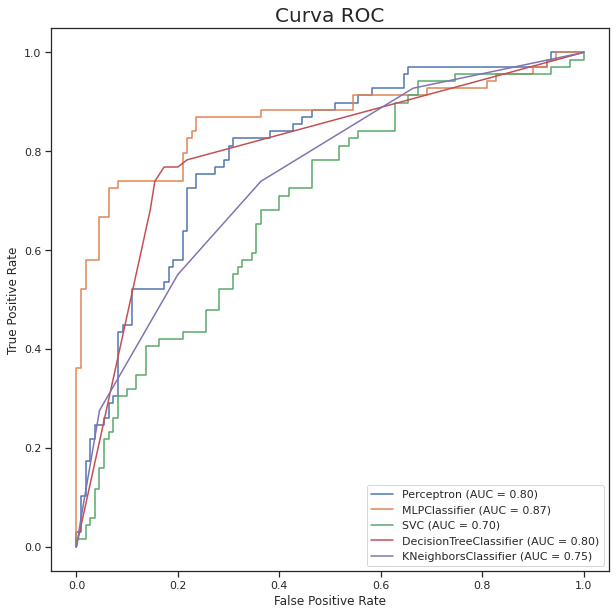

In [117]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Curva ROC',fontsize=20)
for i in range(len(names)):
  clf = classificadores[names[i]]['modelo']
  clf.fit(X_train,y_train)
  plot_roc_curve(clf, X_test,y_test,ax=ax)

Interessante que o classificador MLP deu um AUC de 0.86 utilizando a estratégia de separação stratificada. Testamos alguns random states diferentes e sempre o MLP ganha. Este resultado é diferente do anterior, já que antes o melhor classificador foi a Árvore de decisão. Este resultado é interessante, porque mostra que nesse caso é melhor fazer o treino numa amostra estratificada, já que as classes estão desbalanceadas.



---

### Questão 05.

Agora utilize a função `plot_roc` definida abaixo para o modelo com maior e menor acurácia (de acordo como você calculou na questão 02). Essa função irá calcular a curva ROC utilizando 10-fold cross-validation, exibindo a curva média bem como as curvas para cada fold. Comente se agora o resultado foi conforme o esperado.

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

def plot_roc(classifier, X, y):
  cv = StratifiedKFold(n_splits=10)  

  if isinstance(X, pd.core.frame.DataFrame):
    X = X.values
  if isinstance(y, pd.core.frame.DataFrame) or isinstance(y, pd.core.series.Series):
    y = y.values

  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)

  fig, ax = plt.subplots()
  for i, (train, test) in enumerate(cv.split(X, y)):
      classifier.fit(X[train], y[train])
      viz = plot_roc_curve(classifier, X[test], y[test],
                          name='ROC fold {}'.format(i),
                          alpha=0.3, lw=1, ax=ax)
      interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
      interp_tpr[0] = 0.0
      tprs.append(interp_tpr)
      aucs.append(viz.roc_auc)  

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  std_auc = np.std(aucs)
  ax.plot(mean_fpr, mean_tpr, color='b',
          label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
          lw=2, alpha=.8)

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                  label=r'$\pm$ 1 std. dev.')

  ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
        title="Receiver operating characteristic")
  ax.legend(loc="lower right")
  plt.show()

In [132]:
melhores_medias = [classificadores['Árvore Decisão Critério Gini']['modelo'],classificadores['Multi-Layer Perceptron (15,)']['modelo']]

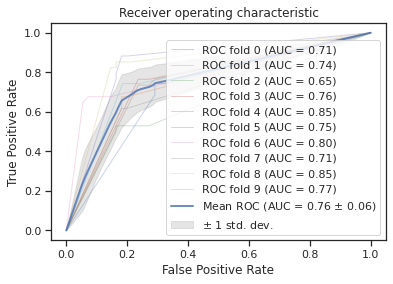

In [133]:
plot_roc(melhores_medias[0], X,y)

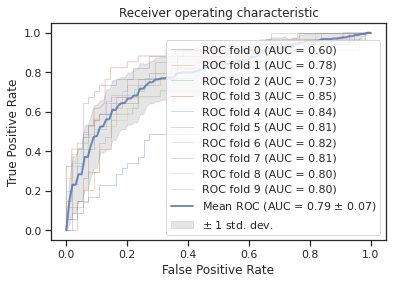

In [134]:
plot_roc(melhores_medias[1],X,y)

Interessante que agora usando a média das curvas ROCs concluimos que o MLP é melhor. Anteriormente tinhamos pego a média das acurácias e visto que a Arvore de decisão tinha ganhado. 



---

### Questão bônus:

Para essa questão você deve testar o seu algoritmo em um conjunto de dados nunca visto através do site [Kaggle](https://www.kaggle.com/c/titanic/overview). A ideia é prever as classes dos dados do arquivo `questao_extra.csv` e submeter o resultado no Kaggle, para que o mesmo faça a avaliação.

O arquivo que você deverá submeter no site deverá conter apenas a coluna "PassegerID" e "Survived" (há um arquivo de submissão de exemplo na pasta do exercício). Na figura abaixo podemos ver a distribuição de performance dos participantes dessa competição.

Note que nessa questão você deve treinar o seu classificador com todos os dados disponíveis (ou seja, todos os dados do arquivo `titanic.csv`).

**Reporte o seu resultado aqui para eu saber o quão bem vocês foram!**

*   Dica: Você pode gerar um arquivo csv a partir de um `DataFrame` com a função `pandas.DataFrame.to_csv`. Lembre-se de passar `index=False`

![alt text](http://playagricola.com/Kaggle/first.png)







Bom, já que o mais interessante foi o MLP, vamos treinar ele com o conjunto de dados inteiro e ver os resultados.

In [136]:
MLP = classificadores['Multi-Layer Perceptron (15,)']['modelo']

In [137]:
MLP.fit(X,y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [140]:
dados_nao_vistos = pd.read_csv('questao_extra.csv')

In [141]:
dados_nao_vistos.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [198]:
id = dados_nao_vistos['PassengerId']

In [144]:
data_new = dados_nao_vistos.drop(['PassengerId','Cabin','Ticket','Name'],axis=1)

In [145]:
data_new.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [146]:
cat_vars = data_new[['Pclass','Sex','Embarked']]
dummies = pd.get_dummies(cat_vars,drop_first=True)

In [147]:
data_new = data_new.drop(['Pclass','Sex','Embarked'],axis=1)

data_new = pd.concat([data_new,dummies],axis=1)

In [148]:
data_new

,Age,SibSp,Parch,Fare,Pclass,Sex_male,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,3,1,1,0
1,47.0,1,0,7.0000,3,0,0,1
2,62.0,0,0,9.6875,2,1,1,0
3,27.0,0,0,8.6625,3,1,0,1
4,22.0,1,1,12.2875,3,0,0,1
...,...,...,...,...,...,...,...,...
413,NaN,0,0,8.0500,3,1,0,1
414,39.0,0,0,108.9000,1,0,0,0
415,38.5,0,0,7.2500,3,1,0,1
416,NaN,0,0,8.0500,3,1,0,1


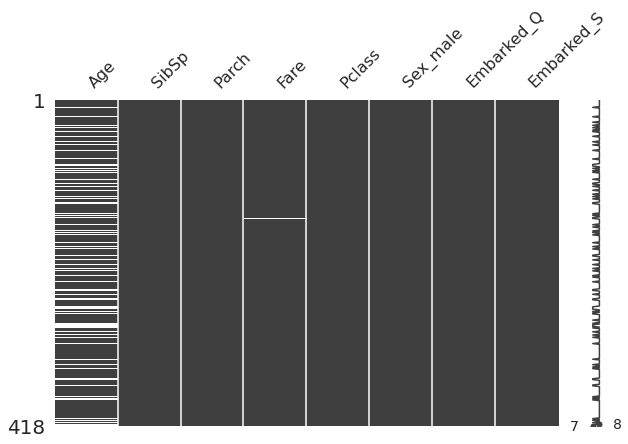

In [150]:
miss.matrix(data_new, figsize = (10, 6))

In [151]:
data_new["Age"].fillna(data_new['Age'].mean(), inplace=True)

In [152]:
data_new["Fare"].fillna(data_new['Fare'].mean(), inplace=True)

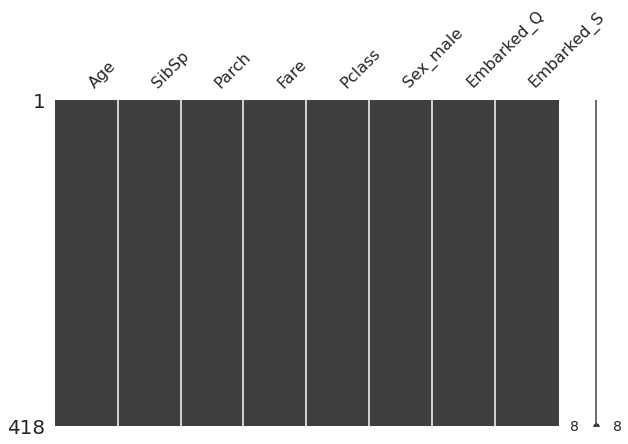

In [153]:
miss.matrix(data_new, figsize = (10, 6))

Agora vejamos as predições

In [194]:
predicoes = MLP.predict(data_new)

In [195]:
predicoes

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [199]:
id = id.to_numpy()

In [200]:
id = id.tolist()

In [201]:
predicoes = predicoes.tolist()

In [206]:
dataframe = pd.DataFrame({'PassengerID':id, 'Survived':predicoes})

In [207]:
dataframe

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [209]:
dataframe.to_csv('Submission.csv',index=False)

O score que obtivemos foi de 0.75598, temos que melhorar as features.